
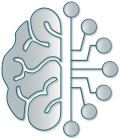

**Start at:** Saturday 18 November 2023, 23:00:19  
**Hostname:** vfornemo-server (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = "./config/"
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color

vID.init(cwd0)
import tools4pyPhysChem as t4pPC

# <!-- TITLE --> MOLECULAR DYNAMICS - VELOCITY VERLET ALGORITHM

## Introduction

<div class="intro">

This computer lab deal with Classical molecular dynamics. In the context of theoretical chemistry, classical molecular dynamic is a computational method that allows study the motion of atoms or molecule under the influence of a specific potential. The principle of molecular dynamic is to solve Newton’s equations of motions in order to simulate the dynamical behaviour of nuclei.
    
The principle of classical molecular dynamics is to solve Newton's equations to model the dynamic behavior of nuclei. In order to calculate the positions of atoms at a given time, it is necessary to use a "propagator". Of the many propagators available, the "Velocity-Verlet" type is among the most widely used. In this case, positions and velocities are propagated over time according to the following equations.
\begin{align}    
\mathbf{x(t+\delta t)=x(t)+v_x(t).\delta t+\frac{1}{2} \gamma(t).\delta t^2} \\    
\end{align}
    
\begin{align}   
\mathbf{v_x(t+\delta t)=v_x(t)+\frac{\gamma(t)+\gamma(t+δt)}{2}.\delta t} \\
\end{align}
    
whith $v(t)$, the velocity (first derivatives of positions with respect to time) and $\gamma (t)$, the acceleration (second derivatives of positions with respect to time).
    
To determine accelerations, we use Newton's law, which relates acceleration to force and thus to the energy gradient.
    
\begin{align}
\vec{\gamma}(t) & = \frac{\vec{F}(t)}{M} \\
\end{align}
    
    
\begin{align}
\vec{F}(t)&=-\vec{\nabla}_x{\mathbf{V(x(t))}}&= -\frac{\partial V(x(t))}{\partial x} \\
\end{align}
    
Initial conditions ($x(t=0)$ and $v(t=0)$) and a potential function are therefore required to achieve dynamics. The propagation of positions and velocities is iterative. By rewriting the "velocity verlet" equations considering t=0, the positions and velocities calculated for δt will become the positions and velocities at t=0 for the next point and so on....
For this project, we'll consider a particle of mass 1 moving on a one-dimensional model potential (the generalisation to two- or more-dimension is straitforward)

</div>



## Definition of the differents potentials

<div class="rqT" title="Directives">
    
- It is necessary to define model potentials before performing MD simulations
- These potentials and the associated forces must be defined using symbolic algebra and may need the SymPy module
</div>


<u>One-dimensional model potentials considered</u>:
    
    
**Harmonic potential**: $$ V(x)=k.(x-x_e)^2 $$


**Morse Potential**: $$V(x)=D_e.(1-e^{-\alpha(x-x_e)})^2$$


**Double_well potential**: $$ V(x)=\frac{1}{2}(f_1(x)+f_2(x))-\frac{1}{2}\sqrt{(f_1(x)-f_2(x))^2+h^2} $$

with $$ f_i(x)=k_i.(x-x_{ei})^2 + V_i $$

    



In [2]:
import sympy as sym
import math
import numpy as np
import matplotlib.pyplot as plt

<div class="rqT" title="Directives">
    
- Each potential can be characterized by several parameters, which need to be defined beforehand. 
</div>

In [3]:
#Define parameters for potentials:
m = 1       # mass of the particle
xe_1 = 0    # Equilibrium distance for harmonic, Morse and double well potentials
xe_2 = -2   # Equilibrium distance for double well potential only

k_1 =  2    # Force constant for harmonic and double well potentials
k_2 =  2    # Force constant for double well potential only

alpha = 0.05     # Parameter for Morse potentia
De = 2           # Prefactor for Morse potential

V_1 =  0      # Translation of potential (1) for double well potential
V_2 =  0      # Translation of potential (2) for double well potential

h = 2         # Coupling term for double well potential

<div class="exE">

- To simplify the switch between potentials, define three differents function as a function of x, one for each potential
- <b/>Forces</b> are a point of utmost importance of the algorithm. Define a function to calculate forces for a selected potential
- Display the analytic expression of the selected potential and associated forces
- Plot the selected potential as a function of the variable 'x' (You may need to use the lambdify function in the SymPy module to calculate a numerical value). 
    
</div>

Harmonic Potential
Potential expression:
Force expression:
Morse Potential
Potential expression:
Force expression:
Double Well Potential
Potential expression:
Force expression:


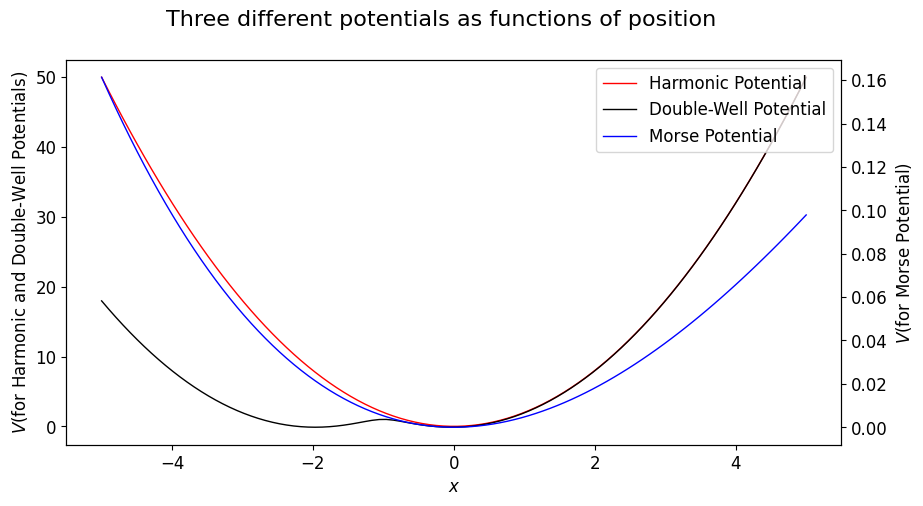

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sympy import Symbol
import matplotlib.pyplot as plt

# Define potentials
def har_V(x):
    v = k_1*(x-xe_1)**2
    return v

def morse_V(x):
    if isinstance(x, Symbol):
        v = De*(1-sym.exp(-alpha*(x-xe_1)))**2
    else:
        v = De*(1-np.exp(-alpha*(x-xe_1)))**2
    return v
    
def dbwl_V(x):
    f1 = k_1*(x-xe_1)**2 + V_1
    f2 = k_2*(x-xe_2)**2 + V_2
    if isinstance(x, Symbol):
        v = .5*(f1+f2) - .5*sym.sqrt((f1-f2)**2 + h**2)
    else:
        v = .5*(f1+f2) - .5*np.sqrt((f1-f2)**2 + h**2)
    return v

# Define force
def force_expr(V_type):
    '''
    V_type: int, type of potential
        default: harmonic potential
        1: morse potential
        2: double well potential
    
    return:
        the expression of force by the given potential
    '''
    if V_type == 1:
        method = morse_V
    elif V_type == 2:
        method = dbwl_V
    else:
        method = har_V
    
    x = sym.symbols("x")
    V = method(x)
    f = -sym.diff(V,x)
    
    return f
    
# Display expressions
# Harmonic
print("Harmonic Potential")
x = sym.symbols("x")
V0 = har_V(x)
f0 = force_expr(0)
print("Potential expression:")
V0
print("Force expression:")
f0

# Morse
print("Morse Potential")
V1 = morse_V(x)
f1 = force_expr(1)
print("Potential expression:")
V1
print("Force expression:")
f1

# Double well
print("Double Well Potential")
V2 = dbwl_V(x)
f2 = force_expr(2)
print("Potential expression:")
V2
print("Force expression:")
f2

# PlotV
_x = np.linspace(-5.,5.,100)
_V0 = sym.lambdify([x],V0) 
_V1 = sym.lambdify([x],V1) 
_V2 = sym.lambdify([x],V2) 

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
fig1, ax11 = plt.subplots()

l11 = ax11.plot(_x, _V0(_x),linewidth=1,color='red',label="Harmonic Potential")
l12 = ax11.plot(_x, _V2(_x),linewidth=1,color='black',label="Double-Well Potential")
ax11.set_xlabel("$x$")
ax11.set_ylabel("$V$(for Harmonic and Double-Well Potentials)")
ax12 = ax11.twinx()
l13 = ax12.plot(_x, _V1(_x),linewidth=1,color='blue',label="Morse Potential")
ax12.set_ylabel("$V$(for Morse Potential)")
ln11, lab11 = ax11.get_legend_handles_labels()
ln12, lab12 = ax12.get_legend_handles_labels()
ax12.legend(ln11+ln12, lab11+lab12, loc=0)
fig1.suptitle('Three different potentials as functions of position', fontsize=16)
plt.show()

## Velocity Verlet Algorithm

<div class="rqT" title="Directives">
    
- Several parameters must be defined to control the MD simulation:
    - step time <b/> δt</b>     
    - Total time or number of steps 
    - The initial position and initial velocity
- <b/>Total energy</b>, defined in the context of Hamiltonian mechanics, is a constant. It must be calculated for each time step in order to check that the algorithm behaves correctly. 
- You will need to use the lambdify function in the SymPy module to calculate a numerical force value for each position.  

</div>

<div class="exE">

- Define the variables that describe the parameters of the MD simulation (initial time will be set to 0)
- Use a loop to implement the velocity verlet algorithm
    - Defining functions for updating positions and speeds can be useful but is not mandatory
- For each step (including the initial step), record in separate tables (or in a single file)
    - Time
    - Position
    - Velocity
    - Energy (i.e value of the potential)
    - Total energy
    
    
</div>

In [5]:
import csv 
#import datetime

# Define variables
t_step = 0.1  # step time
t_init = 0 # initial time
t_tot = 10 # total time
step_tot = 100 # total step
x_init = 1.0 # initial position
vx_init = 0 # initial velocity
M = 1 # particle mass

# Define force
def force(pos, V_method):
    '''
    pos: current position of particle
    V_method: potential method
        
    return:
        the value of force by the given potential
    '''
    x_sym = sym.symbols("x")
    V = V_method(x_sym)
    f = -sym.diff(V,x_sym)
    _f = sym.lambdify([x_sym],f) 
    return _f(pos)

def pos_iter(t_step, pos, spd, V_method):
    f = force(pos, V_method)
    a = f/M # acceleration
    pos_new = pos + spd*t_step + 0.5*a*t_step**2
    return pos_new
    
def spd_iter(t_step, pos, pos_new, spd, V_method):
    f0 = force(pos, V_method)
    f1 = force(pos_new, V_method)
    a0 = f0/M # acceleration when t
    a1 = f1/M # acceleration when t+δt
    spd_new = spd + 0.5*(a0+a1)*t_step
    return spd_new

def dynamics(t_step, t_init, t_tot, step_tot, x_init, vx_init, M, V_type):
    '''
    Perform molecular dynamics
    
    input: 
    t_step:   step time
    t_init:   initial time
    t_tot:    total time
    step_tot: total step
    x_init:   initial position
    vx_init:  initial velocity
    M:        particle mass
    V_type:   int, type of potential
              default: harmonic potential
              1: morse potential
              2: double well potential
    
    Data will be stored in md_log_{potential method}.csv
    '''

    # Select potential method
    if V_type == 1:
        method = morse_V
        meth = "morse"
        m_expr = "Morse Potential"
    elif V_type == 2:
        method = dbwl_V
        meth = "dbwl"
        m_expr = "Double Well Potential"
    else:
        method = har_V
        meth = "har"
        m_expr = "Harmonic Potential"


    # Create file name using potential method
    #now = datetime.datetime.now()
    #time = "_{}{:02d}{:02d}-{:02d}{:02d}{:02d}".format(now.year,now.month,now.day,now.hour,now.minute,now.second)
    #filename = "md_log_" + meth + time + ".csv"
    filename = "md_log_" + meth + ".csv"

    # Create csv file
    f = open(filename, "w")
    writer = csv.writer(f)
    writer.writerow(["Step", "Time", "Position", "Velocity", "Energy", "Total energy"])
    
    # Set initial values
    threthold = 1e-3 # threthold for energy
    step_count = 0
    time_count = t_init
    pos = x_init
    spd = vx_init
    V = method(pos)
    e_tot = 0.5*M*spd**2 + V
    E_tot = e_tot # total energy

    writer.writerow([step_count, t_init, pos, spd, V, e_tot])
    
    e_warning = False # Warning if energy deviates from the given value
    
    # Perform molecular dynamics
    while (step_count < step_tot and time_count <= t_tot):
        pos_new = pos_iter(t_step, pos, spd, method)
        spd = spd_iter(t_step, pos, pos_new, spd, method)
        pos = pos_new
        V = method(pos)
        e_tot = 0.5*M*spd**2 + V
        time_count += t_step
        step_count += 1
        writer.writerow([step_count, time_count, pos, spd, V, e_tot])
        
        # Warning if total energy of the system not correspond to the given E_tot
        if abs(e_tot - E_tot) > threthold:
            e_warning = True
    
    if e_warning:
        print("Warning: total energy of system deviates from the given value.")
        
    print("Molecular Dynamics Complete! Potential method: {}".format(m_expr))
    f.close() 
    

# Run molecular dynamics
for i in range(3):
    dynamics(t_step, t_init, t_tot, step_tot, x_init, vx_init, M, i)


Molecular Dynamics Complete! Potential method: Harmonic Potential
Molecular Dynamics Complete! Potential method: Morse Potential
Molecular Dynamics Complete! Potential method: Double Well Potential


## Post processing

<div class="rqT" title="Directives">
    
- The advantage of MD simulation is that several parameters are stored (in tables or files) and can be used for post-processing
    
    - To check the validity of the algorithm
    - To calculate mean structural or spectroscopic properties

</div>

<div class="exE">

- To check the validity of the algorithm
    - Plot the stored potentials as a function of stored positions 
    - Plot the stored positions or velocities as a function of time
    - Plot the variation in total energy (as a percentage) as a function of time
- To calculate mean structural or spectroscopic properties
    - Calculate the mean value of the position
    
    
</div>

Text(0.5, 0, '$x$')

Text(0, 0.5, '$V$(for Harmonic and Double-Well Potentials)')

Text(0, 0.5, '$V$(for Morse Potential)')

Text(0.5, 0.98, 'Three different potentials as functions of position')

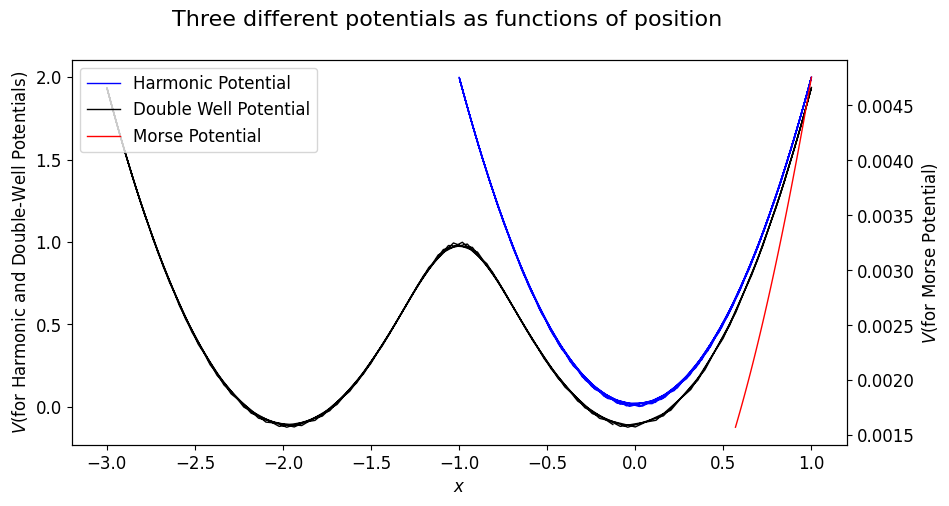

Text(0.5, 0, '$t$')

Text(0, 0.5, '$x$(for Harmonic and Double-Well Potentials)')

Text(0, 0.5, '$x$(for Morse Potential)')

Text(0.5, 0.98, 'Positions as functions of time for three different potentials')

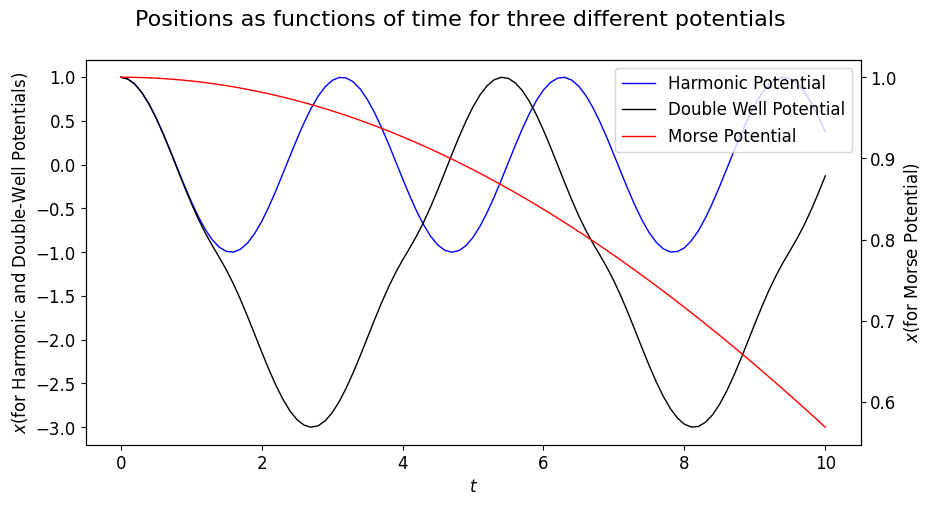

Text(0.5, 0, '$t$ / s')

Text(0, 0.5, '$v$(for Harmonic and Double-Well Potentials)')

Text(0, 0.5, '$v$(for Morse Potential)')

Text(0.5, 0.98, 'Velocities as functions of time for three different potentials')

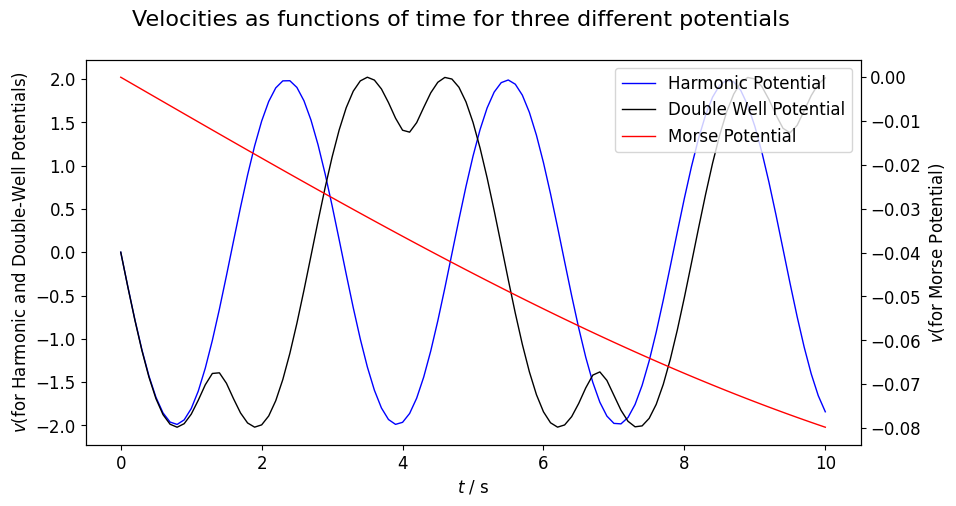

Text(0.5, 0, '$t$ / s')

Text(0, 0.5, '$\\Delta E_{tot} (\\%)$(for Harmonic and Double-Well Potentials)')

Text(0, 0.5, '$\\Delta E_{tot} (\\%)$(for Morse Potential)')

Text(0.5, 0.98, 'Total energy variation as functions of time for three different potentials')

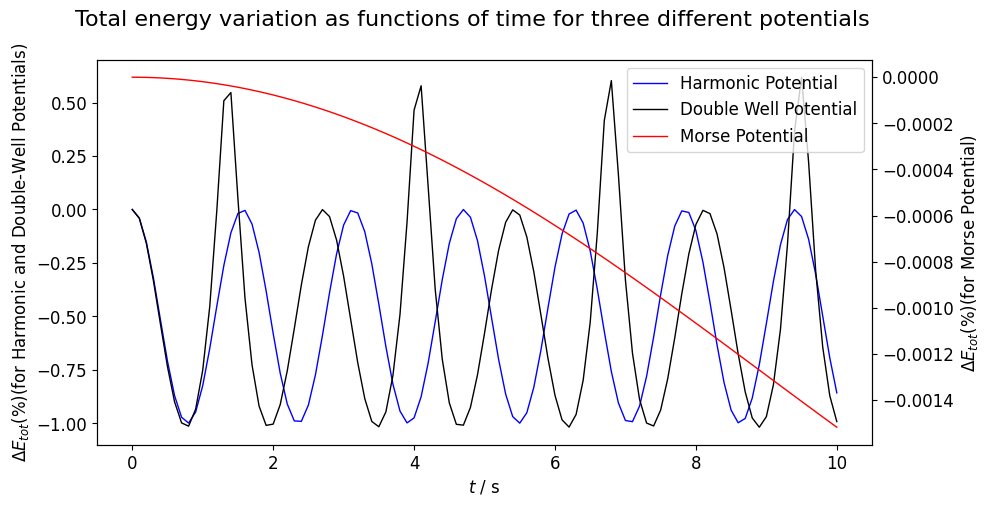

In [6]:
import pandas as pd

# Read data from csv file
df1 = pd.read_csv('md_log_har.csv', usecols = ["Time","Position","Velocity","Energy","Total energy"])
df2 = pd.read_csv('md_log_morse.csv', usecols = ["Time","Position","Velocity","Energy","Total energy"])
df3 = pd.read_csv('md_log_dbwl.csv', usecols = ["Time","Position","Velocity","Energy","Total energy"])
time1 = df1["Time"].tolist()
position1 = df1["Position"].tolist()
velocity1 = df1["Velocity"].tolist()
energy1 = df1["Energy"].tolist()
total_energy1 = df1["Total energy"].tolist()
time2 = df2["Time"].tolist()
position2 = df2["Position"].tolist()
velocity2 = df2["Velocity"].tolist()
energy2 = df2["Energy"].tolist()
total_energy2 = df2["Total energy"].tolist()
time3 = df3["Time"].tolist()
position3 = df3["Position"].tolist()
velocity3 = df3["Velocity"].tolist()
energy3 = df3["Energy"].tolist()
total_energy3 = df3["Total energy"].tolist()
tot_e_var1 = [(x-total_energy1[0])/total_energy1[0]*100 for x in total_energy1]
tot_e_var2 = [(x-total_energy2[0])/total_energy2[0]*100 for x in total_energy2]
tot_e_var3 = [(x-total_energy3[0])/total_energy3[0]*100 for x in total_energy3]

# Plot potentials as a function of position
fig2, ax21 = plt.subplots()
l21 = ax21.plot(position1, energy1,linewidth=1,color='blue', label="Harmonic Potential")
l22 = ax21.plot(position3, energy3,linewidth=1,color='black', label="Double Well Potential")
ax21.set_xlabel("$x$")
ax21.set_ylabel("$V$(for Harmonic and Double-Well Potentials)")
ax22 = ax21.twinx()
l23 = ax22.plot(position2, energy2,linewidth=1,color='red', label="Morse Potential")
ax22.set_ylabel("$V$(for Morse Potential)")
ln21, lab21 = ax21.get_legend_handles_labels()
ln22, lab22 = ax22.get_legend_handles_labels()
ax22.legend(ln21+ln22, lab21+lab22, loc=0)
fig2.suptitle('Three different potentials as functions of position', fontsize=16)
plt.show()

# Plot position as a function of time
fig3, ax31 = plt.subplots()
l31 = ax31.plot(time1, position1,linewidth=1,color='blue', label="Harmonic Potential")
l32 = ax31.plot(time3, position3,linewidth=1,color='black', label="Double Well Potential")
ax31.set_xlabel("$t$")
ax31.set_ylabel("$x$(for Harmonic and Double-Well Potentials)")
ax32 = ax31.twinx()
l33 = ax32.plot(time2, position2,linewidth=1,color='red', label="Morse Potential")
ax32.set_ylabel("$x$(for Morse Potential)")
ln31, lab31 = ax31.get_legend_handles_labels()
ln32, lab32 = ax32.get_legend_handles_labels()
ax32.legend(ln31+ln32, lab31+lab32, loc=0)
fig3.suptitle('Positions as functions of time for three different potentials', fontsize=16)
plt.show()

# Plot velocity as a function of time
fig4, ax41 = plt.subplots()
l41 = ax41.plot(time1, velocity1,linewidth=1,color='blue', label="Harmonic Potential")
l42 = ax41.plot(time3, velocity3,linewidth=1,color='black', label="Double Well Potential")
ax41.set_xlabel("$t$ / s")
ax41.set_ylabel("$v$(for Harmonic and Double-Well Potentials)")
ax42 = ax41.twinx()
l43 = ax42.plot(time2, velocity2,linewidth=1,color='red', label="Morse Potential")
ax42.set_ylabel("$v$(for Morse Potential)")
ln41, lab41 = ax41.get_legend_handles_labels()
ln42, lab42 = ax42.get_legend_handles_labels()
ax42.legend(ln41+ln42, lab41+lab42, loc=0)
fig4.suptitle('Velocities as functions of time for three different potentials', fontsize=16)
plt.show()

# Plot total energy variation as a function of time
fig5, ax51 = plt.subplots()
l51 = ax51.plot(time1, tot_e_var1,linewidth=1,color='blue', label="Harmonic Potential")
l52 = ax51.plot(time3, tot_e_var3,linewidth=1,color='black', label="Double Well Potential")
ax51.set_xlabel("$t$ / s")
ax51.set_ylabel("$\Delta E_{tot} (\%)$(for Harmonic and Double-Well Potentials)")
ax52 = ax51.twinx()
l53 = ax52.plot(time2, tot_e_var2,linewidth=1,color='red', label="Morse Potential")
ax52.set_ylabel("$\Delta E_{tot} (\%)$(for Morse Potential)")
ln51, lab51 = ax51.get_legend_handles_labels()
ln52, lab52 = ax52.get_legend_handles_labels()
ax52.legend(ln51+ln52, lab51+lab52, loc=0)
fig5.suptitle('Total energy variation as functions of time for three different potentials', fontsize=16)
plt.show()


In [7]:
# Calculate the main position of the particle
main_pos1 = sum(position1)/len(position1)
main_pos2 = sum(position2)/len(position2)
main_pos3 = sum(position3)/len(position3)
print("Main position of the particle for harmonic potential: {}".format(main_pos1))
print("Main position of the particle for morse potential: {}".format(main_pos2))
print("Main position of the particle for double well potential: {}".format(main_pos3))

Main position of the particle for harmonic potential: 0.05243475892524305
Main position of the particle for morse potential: 0.8512511455458482
Main position of the particle for double well potential: -1.1177344344551952


## OPTIONNAL :Beyond the potential of one dimension - 2D potentials

<div class="rqT" title="Directives">
    
- A two-dimensional potential can simply be created by adding a one-dimensional potential along x and another along y, as well as any coupling function between x and y.
    
 $$ V(x,y)=V_1(x)+V_2(y)+f(x,y) $$
    
where $𝑉_1 (𝑥)$ and $𝑉_2 (𝑦)$ can be one of the previous potential and with, for example, $𝑓(𝑥,𝑦)=𝑥.𝑦$
    
Using a double-well potential for $𝑉_1 (𝑥)$ and $𝑉_2 (𝑦)$ and the coupling function define just before will creat a four-well potential.


- Another way to implement a two-dimensional potential is to use the so-called Muller-Brown potential:
   $$ V(x,y)=\sum_{i=1}^4 A_i.exp[a_i(x-x^0_i)^2+b_i(x-x^0_i)(y-y^0_i)+c_i(y-y^0_i)^2] $$
    
with

A = (−200, −100, −170, 15)
    
a = (−1, −1, −6.5, 0.7) ; b = (0, 0, 11, 0.6) ; c = (−10, −10, −6.5, 0.7)
    
$x^0$ = (1, 0, −0.5, −1) ; $y^0$ = (0, 0.5, 1.5, 1)
     
</div>

<div class="rqT" title="Directives">
    
- For the Velocity-Verlet algorithm, you will need to calculate new positions (new $x$ and new $y$) and speeds (new $v_x$ and new $v_y$) using the formula given at the beginning:

For $x$:
    
\begin{align}    
\mathbf{x(t+\delta t)=x(t)+v_x(t).\delta t-\frac{1}{2M}\frac{\partial V(x(t),y(t))}{\partial x}.\delta t^2} \\    
\end{align}
    
\begin{align}   
\mathbf{v_x(t+\delta t)=v_x(t)-\frac{1}{2M}[\frac{\partial V(x(t),y(t))}{\partial x}+\frac{\partial V(x(t+\delta t),y(t+\delta t))}{\partial x}].\delta t} \\
\end{align}
    
For $y$:
    
\begin{align}    
\mathbf{y(t+\delta t)=y(t)+v_y(t).\delta t-\frac{1}{2M}\frac{\partial V(x(t),y(t))}{\partial y}.\delta t^2} \\    
\end{align}
    
\begin{align}   
\mathbf{v_y(t+\delta t)=v_y(t)-\frac{1}{2M}[\frac{\partial V(x(t),y(t))}{\partial y}+\frac{\partial V(x(t+\delta t),y(t+\delta t))}{\partial y}].\delta t} \\
\end{align}
        
</div>

<div class="exE">

- You need to answer the same questions as for the 1D potential problem
    
    
</div>

In [8]:
%matplotlib widget

from matplotlib import cm
import matplotlib.animation as animation

# Define 2D potential
def V_2d(x,y,V_method):
    '''
    wrapper function for 2D potential

    x: current position of particle in x direction
    y: current position of particle in y direction
    V_method: potential method
        
    return:
        the value of potential by the given potential
    '''
    if V_method == 0:
        V_func = V_2d_MB
    else:
        V_func = V_2d_QW
    return V_func(x,y)

# Define 2D quadratic well potential
def V_2d_QW(x,y):
    '''
    Quadratic well potential

    x: current position of particle in x direction
    y: current position of particle in y direction
        
    return:
        the value of potential by the given potential
    '''
    v = dbwl_V(x) + dbwl_V(y) + x*y
    return v


# Define 2D Muller-Brown potential
def V_2d_MB(x,y):
    '''
    Muller-Brown potential

    x: current position of particle in x direction
    y: current position of particle in y direction
        
    return:
        the value of potential by the given potential
    '''

    A = [-200, -100, -170, 15]
    a = [-1, -1, -6.5, 0.7]
    b = [0, 0, 11, 0.6]
    c = [-10, -10, -6.5, 0.7]
    x0 = [1, 0, -0.5, -1]
    y0 = [0, 0.5, 1.5, 1]
    v = 0

    if isinstance(x, Symbol) or isinstance(y, Symbol):
        for i in range(4):
            v += A[i]*sym.exp(a[i]*(x-x0[i])**2 + b[i]*(x-x0[i])*(y-y0[i]) + c[i]*(y-y0[i])**2)
    else:
        for i in range(4):
            v += A[i]*np.exp(a[i]*(x-x0[i])**2 + b[i]*(x-x0[i])*(y-y0[i]) + c[i]*(y-y0[i])**2)
    return v

# Print expression of 2D potential
x, y = sym.symbols("x y")
print("2D Quadratic Well Potential")
V3 = V_2d(x,y,1)
V3
print("2D Muller-Brown Potential")
V4 = V_2d(x,y,0)
V4


2D Quadratic Well Potential


1.0*x**2 + x*y + 1.0*y**2 + 1.0*(x + 2)**2 + 1.0*(y + 2)**2 - 0.5*sqrt((2*x**2 - 2*(x + 2)**2)**2 + 4) - 0.5*sqrt((2*y**2 - 2*(y + 2)**2)**2 + 4)

2D Muller-Brown Potential


-100*exp(-x**2 - 10*(y - 0.5)**2) - 200*exp(-10*y**2 - (x - 1)**2) + 15*exp((0.6*x + 0.6)*(y - 1) + 0.7*(x + 1)**2 + 0.7*(y - 1)**2) - 170*exp(-6.5*(x + 0.5)**2 + (11*x + 5.5)*(y - 1.5) - 14.625*(0.666666666666667*y - 1)**2)

In [9]:
# Define 2D force
def force_2d(x_pos, y_pos, xy, V_method):
    '''
    x_pos: current position of particle in x direction
    y_pos: current position of particle in y direction
    xy:    char, 'x' or 'y', indicate the direction of force
        
    return:
        the value of force
    '''
    x_sym, y_sym = sym.symbols("x,y")
    V = V_2d(x_sym, y_sym, V_method)
    
    if xy == 'x':
        f = -sym.diff(V,x_sym)
    elif xy == 'y':
        f = -sym.diff(V,y_sym)
    else:
        RuntimeError("Error: xy must be 'x' or 'y'.")

    _f = sym.lambdify([x_sym, y_sym],f) 
    return _f(x_pos, y_pos)


# Function to update the position of the particle
def pos_iter_2d(t_step, x_pos, y_pos, x_spd, y_spd, V_method):
    f_x = force_2d(x_pos, y_pos, 'x', V_method)
    f_y = force_2d(x_pos, y_pos, 'y', V_method)
    a_x = f_x/M # acceleration in x direction
    a_y = f_y/M # acceleration in y direction
    x_pos_new = x_pos + x_spd*t_step + 0.5*a_x*t_step**2
    y_pos_new = y_pos + y_spd*t_step + 0.5*a_y*t_step**2
    return x_pos_new, y_pos_new
    
# Function to update the velocity of the particle
def spd_iter_2d(t_step, x_pos, x_pos_new, y_pos, y_pos_new, x_spd, y_spd, V_method):
    fx0 = force_2d(x_pos, y_pos, 'x', V_method)
    fx1 = force_2d(x_pos_new, y_pos_new, 'x', V_method)
    fy0 = force_2d(y_pos, y_pos, 'y', V_method)
    fy1 = force_2d(y_pos_new, y_pos_new, 'y', V_method)
    ax0 = fx0/M # acceleration when t in x direction
    ax1 = fx1/M # acceleration when t+δt in x direction
    ay0 = fy0/M # acceleration when t in y direction
    ay1 = fy1/M # acceleration when t+δt in y direction
    x_spd_new = x_spd + 0.5*(ax0+ax1)*t_step
    y_spd_new = y_spd + 0.5*(ay0+ay1)*t_step
    return x_spd_new, y_spd_new


def dynamics_2d(t_step, t_init, t_tot, step_tot, x_init, y_init, vx_init, vy_init, M, V_method):
    '''
    Perform molecular dynamics
    
    input: 
    t_step:   step time
    t_init:   initial time
    t_tot:    total time
    step_tot: total step
    x_init:   initial position in x direction
    y_init:   initial position in y direction
    vx_init:  initial velocity in x direction
    vy_init:  initial velocity in y direction
    E_tot:    total energy
    M:        particle mass
    
    Data will be stored in md_2d_log_{potential model}.csv
    '''

    # Select potential method
    if V_method == 0:
        method = V_2d_MB
        meth = "mb"
        m_expr = "Muller-Brown Potential"
    else:
        method = V_2d_QW
        meth = "qw"
        m_expr = "Quadratic Well Potential"

    # Create file name using date and time
    #now = datetime.datetime.now()
    #time = "_{}{:02d}{:02d}-{:02d}{:02d}{:02d}".format(now.year,now.month,now.day,now.hour,now.minute,now.second)
    # filename = "md_2d_log" + time + ".csv"
    filename = "md_2d_log_" + meth + ".csv"


    # Create csv file
    f = open(filename, "w")
    writer = csv.writer(f)
    writer.writerow(["Step", "Time", "Position x", "Position y", "Velocity x", "Velocity y", "Kinetic", "Potential", "Total energy"])
    
    # Set initial values
    threthold = 1e-3 # threthold for energy
    step_count = 0
    time_count = t_init
    x_pos = x_init
    y_pos = y_init
    x_spd = vx_init
    y_spd = vy_init
    V = V_2d(x_pos, y_pos, V_method)
    kin = 0.5*M*(x_spd**2 + y_spd**2)
    e_tot = kin + V
    E_tot = e_tot # total energy
    writer.writerow([step_count, t_init, x_pos, y_pos, x_spd, y_spd, kin, V, e_tot])
    
    e_warning = False # Warning if energy deviates from the given value
    
    # Perform molecular dynamics
    while (step_count < step_tot and time_count <= t_tot):
        x_pos_new, y_pos_new = pos_iter_2d(t_step, x_pos, y_pos, x_spd, y_spd, V_method)
        x_spd, y_spd = spd_iter_2d(t_step, x_pos, x_pos_new, y_pos, y_pos_new, x_spd, y_spd, V_method)
        x_pos, y_pos = x_pos_new, y_pos_new
        V = V_2d(x_pos, y_pos, V_method)
        kin = 0.5*M*(x_spd**2 + y_spd**2)
        e_tot = kin + V
        time_count += t_step
        step_count += 1
        writer.writerow([step_count, time_count, x_pos, y_pos, x_spd, y_spd, kin, V, e_tot])
        
        # Warning if total energy of the system not correspond to the given E_tot
        if abs(e_tot - E_tot) > threthold:
            e_warning = True
    
    if e_warning:
        print("Warning: total energy of system deviates from the given value.")
        
    print("2D Molecular Dynamics Complete! Potential method: {}".format(m_expr))
    f.close() 
    

2D Molecular Dynamics Complete! Potential method: Quadratic Well Potential


Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

Text(0.5, 0.98, 'Particle Trajectory for Quadratic Well Potential')

MovieWriter ffmpeg unavailable; using Pillow instead.


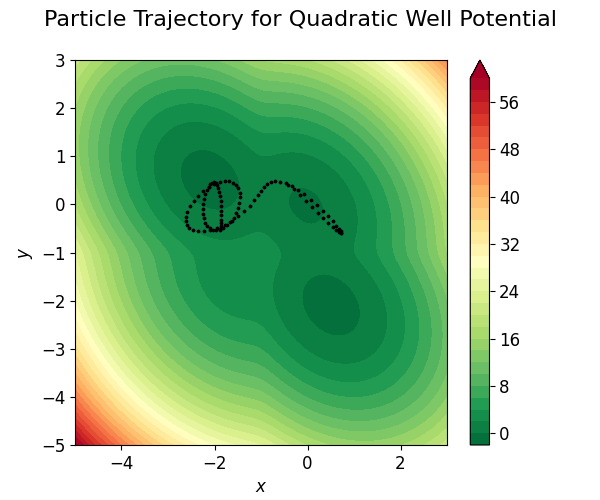

Check md_2d_qw.gif for the animation of particle trajectory.


Text(0.5, 0, '$t$ / s')

Text(0, 0.5, '$v$')

Text(0.5, 0.98, 'Velocities as functions of time for Quadratic Well Potential')

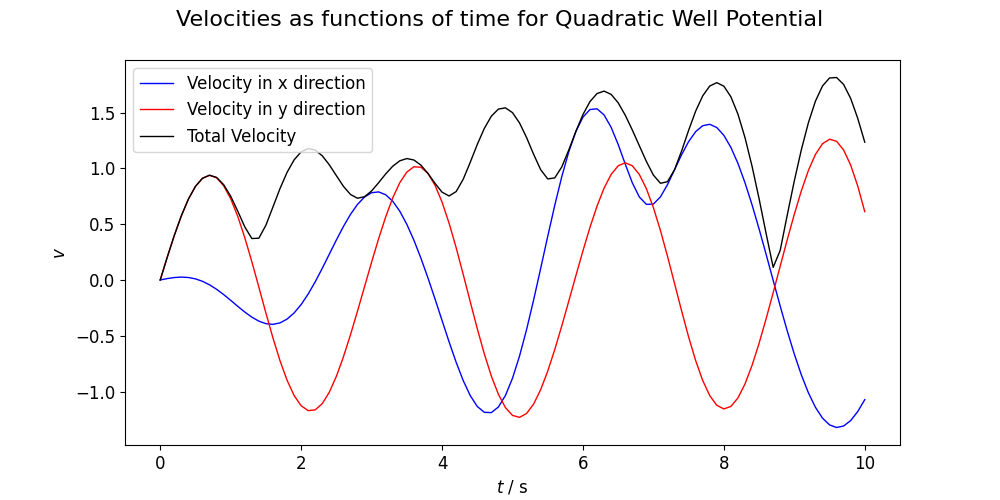

Text(0.5, 0, '$t$ / s')

Text(0, 0.5, '$\\Delta E_{tot} (\\%)$')

Text(0.5, 0.98, 'Total energy variation as functions of time for Quadratic Well Potential')

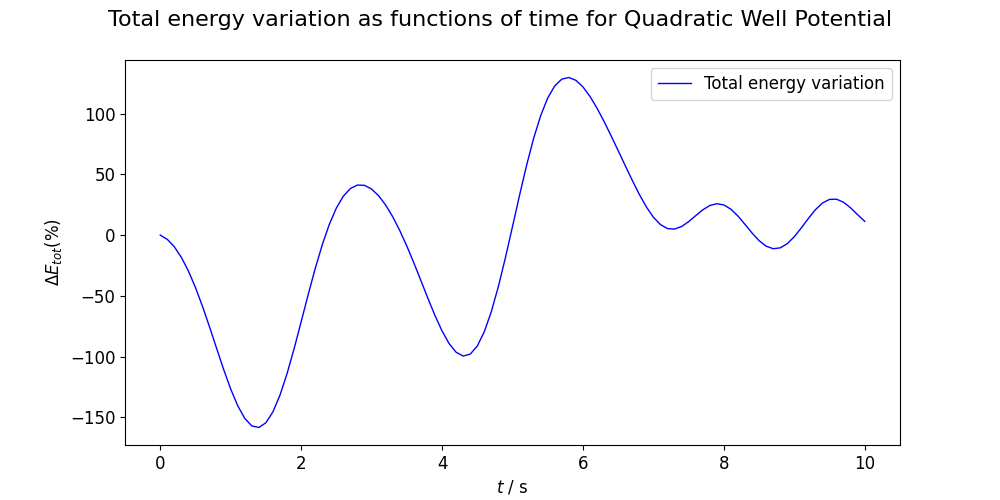

In [10]:
# Using Quatraic Well Potential

# Define variables
t_init = 0 # initial time
t_step = 0.1  # step time
t_tot = 10 # total time
step_tot = 100 # total step
x_init = -1.87 # initial position in x direction
y_init = -0.5 # initial position in y direction
vx_init = 0.0 # initial velocity in x direction
vy_init = 0.0 # initial velocity in y direction
M = 1 # particle mass
dynamics_2d(t_step, t_init, t_tot, step_tot, x_init, y_init, vx_init, vy_init, M, 1)

# PlotV using contour
_x1 = np.linspace(-5.0,3.0,100)
_y1 = np.linspace(-5.0,3.0,100)
X1, Y1 = np.meshgrid(_x1, _y1)
Z1 = V_2d(X1,Y1,1)
# Z[Z>1000] = 1000
fig6, ax6 = plt.subplots(figsize=(6,5))
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
con1 = plt.contourf(X1, Y1, Z1, 30, cmap=cm.RdYlGn_r, extend='max')
fig6.colorbar(con1, ax=ax6)
ax6.set_xlabel("$x$")
ax6.set_ylabel("$y$")
fig6.suptitle('Particle Trajectory for Quadratic Well Potential', fontsize=16)

# Plot 2D trajectory
# Read data
df4 = pd.read_csv('md_2d_log_qw.csv', usecols = ["Position x","Position y", "Velocity x","Velocity y", "Total energy", "Time"])
x_pos1 = df4["Position x"].tolist()
y_pos1 = df4["Position y"].tolist()
time4 = df4["Time"].tolist()

# Plot trajectory
scat1 = plt.scatter(x_pos1[0], y_pos1[0], c="black", s=3)

def update1(frame):
    # for each frame, update the data stored on each artist.
    x = x_pos1[:frame]
    y = y_pos1[:frame]
    # update the scatter plot
    data = np.stack([x, y]).T
    scat1.set_offsets(data)
    return scat1

anim = animation.FuncAnimation(fig=fig6, func=update1, frames=len(x_pos1), interval=10, repeat=False)
anim.save('md_2d_qw.gif', dpi=80)
plt.show()
print("Check md_2d_qw.gif for the animation of particle trajectory.")

# Plot velocities as a function of time
x_vel1 = df4["Velocity x"].tolist()
y_vel1 = df4["Velocity y"].tolist()
tot_vel1 = np.sqrt(np.array(x_vel1)**2 + np.array(y_vel1)**2)
fig7, ax7 = plt.subplots()
l71 = ax7.plot(time4, x_vel1,linewidth=1,color='blue', label="Velocity in x direction")
l72 = ax7.plot(time4, y_vel1,linewidth=1,color='red', label="Velocity in y direction")
l73 = ax7.plot(time4, tot_vel1,linewidth=1,color='black', label="Total Velocity")
ax7.set_xlabel("$t$ / s")
ax7.set_ylabel("$v$")
ax7.legend(loc=0)
fig7.suptitle('Velocities as functions of time for Quadratic Well Potential', fontsize=16)
plt.show()

# Plot total energy variation as a function of time
tot_e1 = df4["Total energy"].tolist()
tot_e_var4 = [(x-tot_e1[0])/tot_e1[0]*100 for x in tot_e1]
fig8, ax8 = plt.subplots()
l8 = ax8.plot(time4, tot_e_var4,linewidth=1,color='blue', label="Total energy variation")
ax8.set_xlabel("$t$ / s")
ax8.set_ylabel("$\Delta E_{tot} (\%)$")
ax8.legend(loc=0)
fig8.suptitle('Total energy variation as functions of time for Quadratic Well Potential', fontsize=16)
plt.show()


2D Molecular Dynamics Complete! Potential method: Muller-Brown Potential


Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

Text(0.5, 0.98, 'Particle Trajectory for Muller-Brown Potential')

MovieWriter ffmpeg unavailable; using Pillow instead.


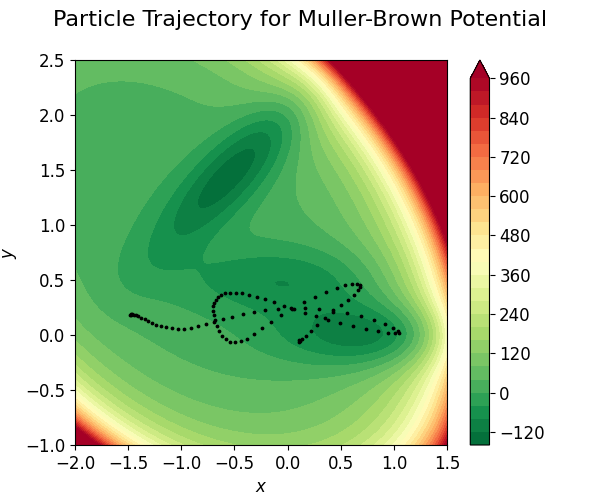

Check md_2d_mb.gif to see the trajectory of the particle.


Text(0.5, 0, '$t$ / s')

Text(0, 0.5, '$v$')

Text(0.5, 0.98, 'Velocities as functions of time for Quadratic Well Potential')

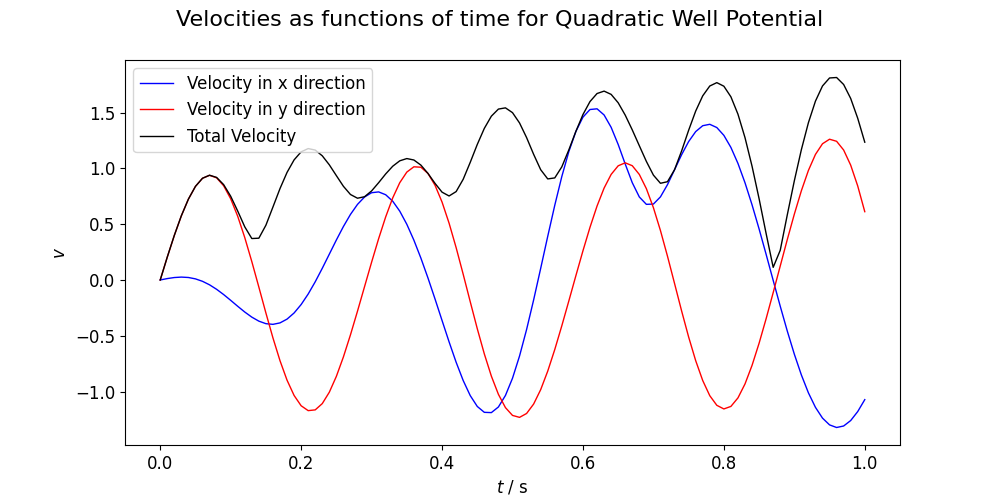

Text(0.5, 0, '$t$ / s')

Text(0, 0.5, '$\\Delta E_{tot} (\\%)$')

Text(0.5, 0.98, 'Total energy variation as functions of time for Muller-Brown Potential')

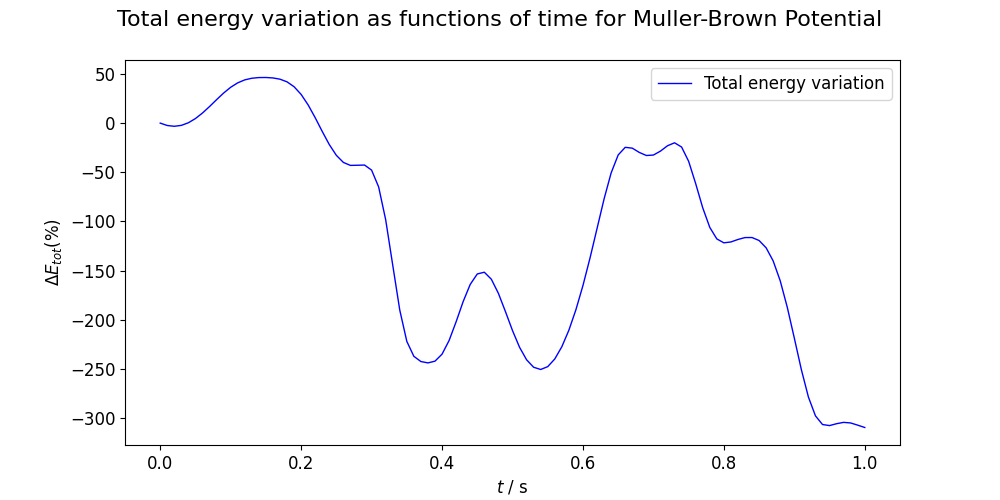

In [11]:
# Using Muller-Brown Potential

# Define variables
t_init = 0 # initial time
t_step = 0.01  # step time
t_tot = 10 # total time
step_tot = 100 # total step
x_init = -1.48 # initial position in x direction
y_init = 0.18 # initial position in y direction
vx_init = 0.0 # initial velocity in x direction
vy_init = 0.0 # initial velocity in y direction
M = 1 # particle mass
dynamics_2d(t_step, t_init, t_tot, step_tot, x_init, y_init, vx_init, vy_init, M, 0)

# PlotV using contour
_x2 = np.linspace(-2.0,1.5,100)
_y2 = np.linspace(-1.0,2.5,100)
X2, Y2 = np.meshgrid(_x2, _y2)
Z2 = V_2d(X2,Y2,0)
Z2[Z2>1000] = 1000
fig9, ax9 = plt.subplots(figsize=(6,5))
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
con2 = plt.contourf(X2, Y2, Z2, 30, cmap=cm.RdYlGn_r, extend='max')
fig9.colorbar(con2, ax=ax9)
ax9.set_xlabel("$x$")
ax9.set_ylabel("$y$")
fig9.suptitle('Particle Trajectory for Muller-Brown Potential', fontsize=16)

# Plot 2D trajectory
# Read data
df5 = pd.read_csv('md_2d_log_mb.csv', usecols = ["Position x","Position y", "Velocity x","Velocity y", "Total energy", "Time"])
x_pos2 = df5["Position x"].tolist()
y_pos2 = df5["Position y"].tolist()
time5 = df5["Time"].tolist()

# Plot trajectory
scat2 = plt.scatter(x_pos2[0], y_pos2[0], c="black", s=3)

def update2(frame):
    # for each frame, update the data stored on each artist.
    x = x_pos2[:frame]
    y = y_pos2[:frame]
    # update the scatter plot
    data = np.stack([x, y]).T
    scat2.set_offsets(data)
    return scat2

anim2 = animation.FuncAnimation(fig=fig9, func=update2, frames=len(x_pos2), interval=10, repeat=False)
anim2.save('md_2d_mb.gif', dpi=80)
plt.show()
print("Check md_2d_mb.gif to see the trajectory of the particle.")

# Plot velocities as a function of time
x_vel2 = df5["Velocity x"].tolist()
y_vel2 = df5["Velocity y"].tolist()
tot_vel2 = np.sqrt(np.array(x_vel2)**2 + np.array(y_vel2)**2)
fig10, ax10 = plt.subplots()
l101 = ax10.plot(time5, x_vel1,linewidth=1,color='blue', label="Velocity in x direction")
l102 = ax10.plot(time5, y_vel1,linewidth=1,color='red', label="Velocity in y direction")
l103 = ax10.plot(time5, tot_vel1,linewidth=1,color='black', label="Total Velocity")
ax10.set_xlabel("$t$ / s")
ax10.set_ylabel("$v$")
ax10.legend(loc=0)
fig10.suptitle('Velocities as functions of time for Quadratic Well Potential', fontsize=16)
plt.show()

# Plot total energy variation as a function of time
tot_e2 = df5["Total energy"].tolist()
tot_e_var5 = [(x-tot_e2[0])/tot_e2[0]*100 for x in tot_e2]
fig11, ax11 = plt.subplots()
l11 = ax11.plot(time5, tot_e_var5,linewidth=1,color='blue', label="Total energy variation")
ax11.set_xlabel("$t$ / s")
ax11.set_ylabel("$\Delta E_{tot} (\%)$")
ax11.legend(loc=0)
fig11.suptitle('Total energy variation as functions of time for Muller-Brown Potential', fontsize=16)
plt.show()



In [12]:
# Main position of the particle
# Quadratic Well Potential
main_posx1 = sum(x_pos1)/len(x_pos1)
main_posy1 = sum(y_pos1)/len(y_pos1)
print("Main position of the particle for Quadratic Well Potential: ({}, {})".format(main_posx1, main_posy1))

# Muller-Brown Potential
main_posx2 = sum(x_pos2)/len(x_pos2)
main_posy2 = sum(y_pos2)/len(y_pos2)
print("Main position of the particle for Muller-Brown Potential: ({}, {})".format(main_posx2, main_posy2))


Main position of the particle for Quadratic Well Potential: (-1.32295933341831, -0.052703071212460366)
Main position of the particle for Muller-Brown Potential: (-0.19584418516418955, 0.1742325287284797)


# End

In [13]:
vID.end(cwd0)

**End at:** Saturday 18 November 2023, 23:00:48  
**Duration:** 00:00:28 269ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>